In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set the no of columns to be displayed to 500
pd.set_option('display.max_columns', 500)

# Set the no of rows to be displayed to 200
pd.set_option('display.max_rows', 300)

import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score , roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data into the python
df_telecom = pd.read_csv(r'C:\Users\tabish\Downloads\telecom_churn_data.csv')

In [3]:
df_telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Checking the shape of dataframe
df_telecom.shape

(99999, 226)

In [5]:
# Checking the datatype of each variables
df_telecom.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
# Checking the percentile of dataframe
df_telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# Dropping the duplicates if any
df_telecom = df_telecom.drop_duplicates()
df_telecom.shape

(99999, 226)

# Data Cleaning

In [8]:
# Checking for unique values
df_telecom.nunique().sort_values(ascending = False)

mobile_number               99999
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
total_og_mou_7              40477
total_og_mou_6              40327
total_og_mou_8              40074
total_og_mou_9              39160
total_ic_mou_6              32247
total_ic_mou_7              32242
total_ic_mou_8              32128
total_ic_mou_9              31260
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
loc_ic_mou_6                28569
loc_ic_mou_7                28390
loc_ic_mou_8                28200
std_og_mou_7                27951
loc_ic_mou_9                27697
std_og_mou_6                27502
std_og_mou_8                27491
std_og_mou_9                26553
loc_og_mou_6                26372
loc_og_mou_7                26091
loc_og_mou_8                25990
loc_og_mou_9                25376
onnet_mou_7   

In [9]:
# Checking the missing values
df_telecom.isnull().sum().sort_values(ascending = False)

count_rech_2g_6             74846
date_of_last_rech_data_6    74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
max_rech_data_6             74846
total_rech_data_6           74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
fb_user_6                   74846
arpu_3g_7                   74428
count_rech_2g_7             74428
fb_user_7                   74428
count_rech_3g_7             74428
arpu_2g_7                   74428
av_rech_amt_data_7          74428
max_rech_data_7             74428
night_pck_user_7            74428
total_rech_data_7           74428
date_of_last_rech_data_7    74428
night_pck_user_9            74077
date_of_last_rech_data_9    74077
fb_user_9                   74077
arpu_2g_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
total_rech_data_9           74077
av_rech_amt_data_9          74077
count_rech_3g_9             74077
count_rech_2g_

In [10]:
round(df_telecom.isnull().sum() / len(df_telecom.index) * 100).sort_values(ascending = False)


max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
total_rech_data_6           75.0
arpu_3g_8                   74.0
arpu_3g_7                   74.0
total_rech_data_7           74.0
arpu_3g_9                   74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_9           74.0
total_rech_data_8           74.0
av_rech_amt_data_9          74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
count_rech_3g_9             74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
av_rech_am

 ### Impute the columns such as total_rech_data_6, total_rech_data_7, av_rech_amt_data_6, av_rech_amt_data_7 etc with zero

In [11]:
df_telecom['total_rech_data_6'] = df_telecom['total_rech_data_6'].fillna(0)
df_telecom['total_rech_data_7'] = df_telecom['total_rech_data_7'].fillna(0)
df_telecom['av_rech_amt_data_6'] = df_telecom['av_rech_amt_data_6'].fillna(0)
df_telecom['av_rech_amt_data_7'] = df_telecom['av_rech_amt_data_7'].fillna(0)

In [12]:
# Dropping all the columns having missing values greater than 70%
df_telecom = df_telecom.loc[:,df_telecom.columns[round((df_telecom.isnull().sum(axis = 0)/len(df_telecom.index)*100),2) < 70]]
df_telecom.shape

(99999, 190)

In [13]:
# Imputing the rest with median values
df_telecom = df_telecom.fillna(df_telecom.median())

In [14]:
#Putting all the date columns in to the list 
date_cols = df_telecom.columns[df_telecom.columns.str.contains('date')].tolist()

# Dropping all the columns in the list
df_telecom = df_telecom.drop(date_cols, axis = 1)

# checking the shape after dropping the columns
df_telecom.shape

(99999, 182)

In [15]:
# Now again checking the missing values after treating them
round(df_telecom.isnull().sum() / len(df_telecom.index) * 100).sort_values(ascending = False)

sep_vbc_3g            0.0
isd_og_mou_8          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_9      0.0
std_og_t2c_mou_8      0.0
std_og_t2c_mou_7      0.0
std_og_t2c_mou_6      0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
std_og_t2m_mou_9      0.0
std_og_t2m_mou_8      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_6      0.0
std_og_t2t_mou_9      0.0
std_og_t2t_mou_8      0.0
isd_og_mou_7          0.0
isd_og_mou_9          0.0
std_og_t2t_mou_6      0.0
spl_og_mou_6          0.0
loc_ic_t2m_mou_9      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_mou_7      0.0
loc_ic_t2m_mou_6      0.0
loc_ic_t2t_mou_9      0.0
loc_ic_t2t_mou_8      0.0
loc_ic_t2t_mou_7      0.0
loc_ic_t2t_mou_6      0.0
total_og_mou_9        0.0
total_og_mou_8        0.0
total_og_mou_7        0.0
total_og_mou_6        0.0
og_others_9           0.0
og_others_8 

##### It can be seen that there is no missing values present

In [16]:

# Dropping the mobile number
df_telecom = df_telecom.drop(['mobile_number', 'circle_id'], axis = 1)
df_telecom.shape

(99999, 180)

##### Making new columns to filter High Value Customer

In [17]:
# Combining the data and call columns into one column for month 6
df_telecom['Data_Call_6'] = df_telecom['total_rech_amt_6'] + (df_telecom['total_rech_data_6'] * df_telecom['av_rech_amt_data_6'])

# # Combining the data and call columns into one column for month 7
df_telecom['Data_Call_7'] = df_telecom['total_rech_amt_7'] + (df_telecom['total_rech_data_7'] * df_telecom['av_rech_amt_data_7'])

# Adding the Data and call for 6th and 7th
df_telecom['Average_Data_Call'] = (df_telecom['Data_Call_7'] + df_telecom['Data_Call_6']) / 2

In [18]:
df_telecom.shape

(99999, 183)

In [19]:
# Dropping original columns
df_telecom = df_telecom.drop(['Data_Call_6', 'total_rech_amt_6', 'total_rech_data_6', 'av_rech_amt_data_6', 'Data_Call_7', 'total_rech_amt_7', 'total_rech_data_7', 'av_rech_amt_data_7'], axis = 1)
df_telecom.shape

(99999, 175)

# Derived Features

In [20]:
# for month 6
df_telecom['Total_MOU_6'] = df_telecom['total_og_mou_6'] + df_telecom['total_ic_mou_6']

# for month 7
df_telecom['Total_MOU_7'] = df_telecom['total_og_mou_7'] + df_telecom['total_ic_mou_7']


In [21]:
df_telecom['Monthly_2g_3g_6'] = df_telecom['monthly_2g_6'] + df_telecom['monthly_3g_6']

# for month 7
df_telecom['Monthly_2g_3g_7'] = df_telecom['monthly_2g_7'] + df_telecom['monthly_3g_7']


In [22]:
# Dropping original columns
df_telecom = df_telecom.drop(['total_og_mou_6', 'total_ic_mou_6', 'total_og_mou_7', 'total_ic_mou_7', 'monthly_2g_6', 'monthly_3g_6', 'monthly_2g_7', 'monthly_3g_7'], axis = 1)

# checking the shape of dataframe
df_telecom.shape

(99999, 171)

## Filtering the High Value Customer


In [23]:
#length of the dataframe after filtering out high valued customers
len(df_telecom[df_telecom['Average_Data_Call'] >= round(df_telecom['Average_Data_Call'].quantile(0.7))].index)

30001

In [24]:
# Making dataframe of high value customer
High_Value_Cust = df_telecom[df_telecom['Average_Data_Call'] >= round(df_telecom['Average_Data_Call'].quantile(0.7))]
High_Value_Cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Data_Call,Total_MOU_6,Total_MOU_7,Monthly_2g_3g_6,Monthly_2g_3g_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,559.0,0.00,0.00,1,1
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.160,325.91,87.29,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.910,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.760,49.14,2.50,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,5.38,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.0,15.74,15.

In [25]:
# Checking the shape of High Value Customer
High_Value_Cust.shape

(30001, 171)

## Outlier Analysis

In [26]:
Q1=High_Value_Cust.Average_Data_Call.quantile(0.25)
Q3=High_Value_Cust.Average_Data_Call.quantile(0.75)
IQR=Q3-Q1
High_Value_Cust=High_Value_Cust[(High_Value_Cust.Average_Data_Call>=Q1-1.5*IQR)&(High_Value_Cust.Average_Data_Call<=Q3+1.5*IQR)]

In [27]:
# checking the shape after outlier treatment
High_Value_Cust.shape

(27360, 171)

##### Outliers are removed from single column Average_Data_Call otherwise we will lose a many data which is not great for modelling

## Predicting Churn


In [28]:
High_Value_Cust['Churn'] = (High_Value_Cust['total_ic_mou_9'] == 0) & (High_Value_Cust['total_og_mou_9'] == 0) \
                             & (High_Value_Cust['vol_2g_mb_9'] == 0) & (High_Value_Cust['vol_3g_mb_9'] == 0)
High_Value_Cust['Churn'] = High_Value_Cust['Churn'].apply(lambda x : 1 if x else 0)
High_Value_Cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Data_Call,Total_MOU_6,Total_MOU_7,Monthly_2g_3g_6,Monthly_2g_3g_7,Churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,559.0,0.00,0.00,1,1,1
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.160,325.91,87.29,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.910,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.760,49.14,2.50,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,5.38,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.0,1

In [29]:
# Churn rate for high valued customers
High_Value_Cust['Churn'].sum()/len(High_Value_Cust.index)

0.08267543859649122

In [30]:
# Putting the 9th month columns to the list 
churn_cols = High_Value_Cust.columns[High_Value_Cust.columns.str.contains('_9')].tolist()

# Dropping attributes with 9th month in it
High_Value_Cust = High_Value_Cust.drop(churn_cols,axis=1)

# Checking the shape
High_Value_Cust.shape

(27360, 130)

In [31]:
# Checking the info
High_Value_Cust.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27360 entries, 0 to 99997
Data columns (total 130 columns):
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8    

## UNIVARIATE AND BIVARIATE ANALYSIS

In [32]:
# Create function for Univariate Analysis
def plot(lvar):
    print(High_Value_Cust[lvar].describe())
    plt.figure(figsize = (10, 8))
    sns.distplot(High_Value_Cust[lvar])
    plt.title('Univariate Analysis of Variable ' + lvar, fontsize = 15)
    plt.show()

In [33]:
# Create function for Bivariate Analysis
def plot_bivariate(lvar1, lvar2):
    plt.figure(figsize = (10, 8))
    sns.boxplot(lvar1, lvar2, data = High_Value_Cust)
    plt.title('Bivariate Analysis of Variables ' + lvar1 + 'And ' + lvar2, fontsize = 15)
    plt.show()

### Univariate Analysis

count    27360.000000
mean       879.413611
std        376.834274
min        478.000000
25%        589.375000
50%        756.000000
75%       1060.000000
max       2115.000000
Name: Average_Data_Call, dtype: float64


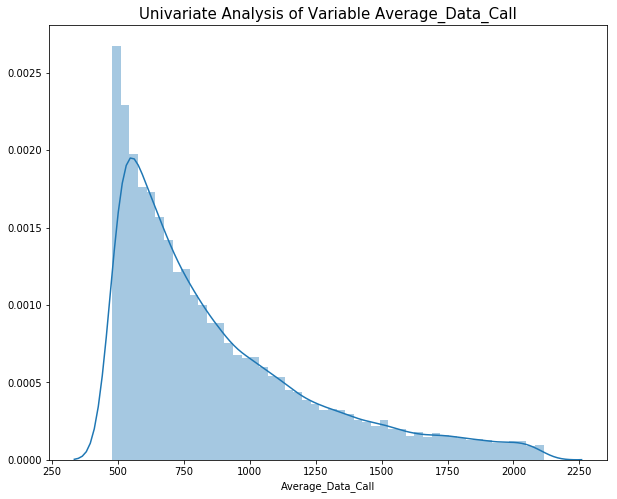

In [34]:
plot('Average_Data_Call')

count    27360.000000
mean       921.889934
std        809.236528
min          0.000000
25%        312.185000
50%        767.070000
75%       1297.895000
max       8995.240000
Name: Total_MOU_7, dtype: float64


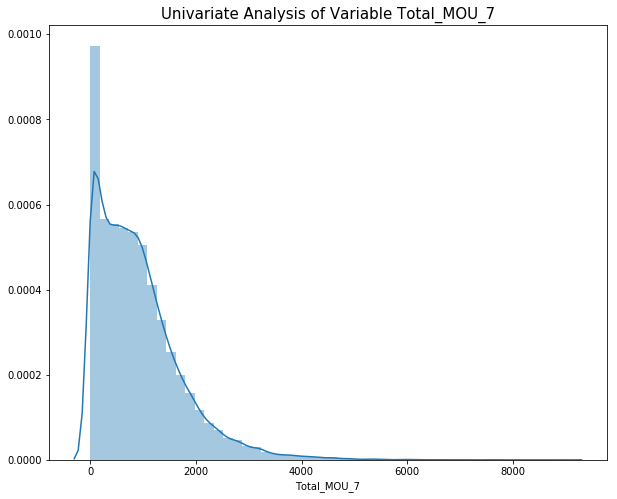

In [35]:
plot('Total_MOU_7')           

count    27360.000000
mean       243.744223
std        547.360855
min          0.000000
25%          0.000000
50%          0.000000
75%        231.945000
max      11884.140000
Name: vol_3g_mb_6, dtype: float64


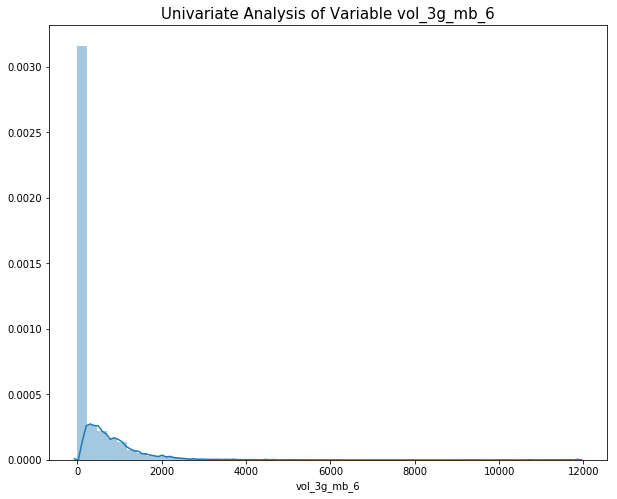

In [36]:
plot('vol_3g_mb_6')

## BIVARIATE ANALYSIS

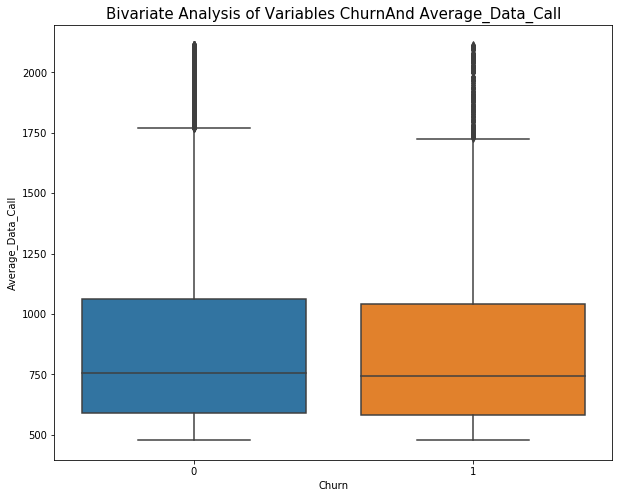

In [37]:
plot_bivariate('Churn', 'Average_Data_Call')

#### From above fig it can be seen the distribution between churn and non churn is almost same for Average_Data_Call




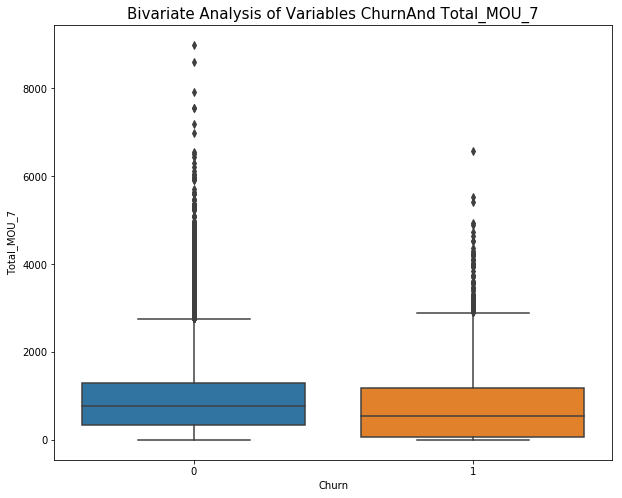

In [38]:
plot_bivariate('Churn', 'Total_MOU_7')

##### For Total_MOU_7 non churn minutes of usage are more than churn and it has gone upto 8000

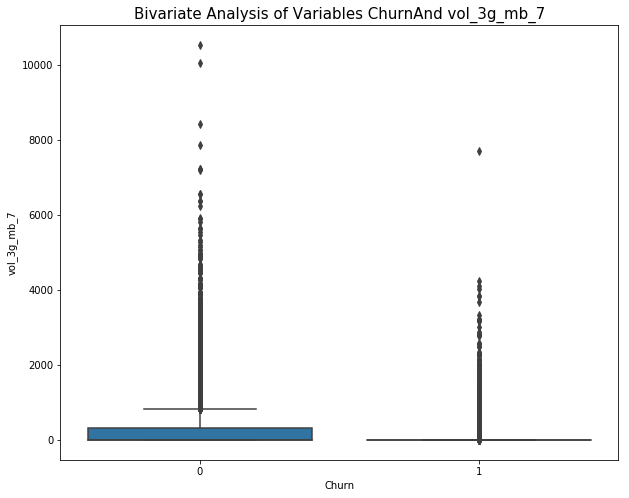

In [39]:
plot_bivariate('Churn', 'vol_3g_mb_7')

##### For Vol_3g_mb_7 the distribution is different as mean value can't be seen for both churn and non churn.

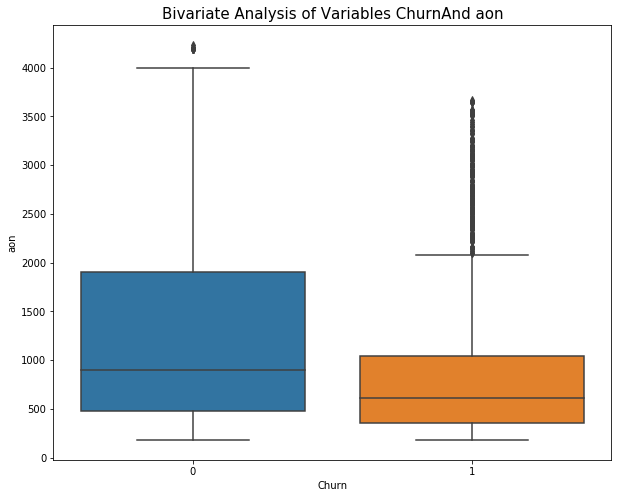

In [40]:
plot_bivariate('Churn', 'aon')

#####  For aon variable the distribution is not uniform and for non  churn the distribution is more towards above mean  and churn the distribution is almost uniform

# MODEL BUILDING

In [41]:
# Putting feature variables to X
X = High_Value_Cust.drop(['Churn'], axis = 1)

# Putting target variable to y
y = High_Value_Cust['Churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int64

In [42]:
# splitting into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [43]:
# Checking training dataset
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Data_Call,Total_MOU_6,Total_MOU_7,Monthly_2g_3g_6,Monthly_2g_3g_7
18350,0.0,0.0,0.0,112.722,483.665,297.090,99.83,123.06,129.43,130.04,82.98,66.76,0.00,0.0,0.00,0.00,0.0,0.00,99.83,123.06,129.43,128.19,76.96,49.88,0.00,1.36,0.00,0.0,0.00,15.91,228.03,201.39,179.31,0.00,0.00,0.00,1.85,4.65,0.96,0.0,0.0,0.0,0.0,0.0,0.0,1.85,4.65,0.96,0.0,0.0,0.0,0.00,0.00,15.91,0.0,0.0,0.0,196.19,30.13,48.99,54.53,74.74,110.76,71.59,100.18,77.41,54.48,205.06,237.18,180.61,0.00,0.00,0.00,0.00,0.00,0.00,1.03,1.99,3.59,0.0,0.0,0.0,1.03,1.99,3.59,184.49,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.96,0.28,1,4,7,359,110,252,252,110,50,86,0.00,3.36,28.23,0.0,2086.18,2240.86,0,0,0,0,3,0,0,0,2537,973.61,1371.20,1706.75,0.00,817.5,435.97,446.18,0,2
76689,0.0,0.0,0.0,349.490,544.144,512.183,9.19,4.53,3.24,228.38,280.63,258.91,0.00,0.0,0.00,0.00,0.0,0.00,9.19,4.53,3.24,228.38,280.63,258.56,0.00,0.00,0.35,0.0,0.00,0.00,237.58,285.16,262.16,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,262.16,5.98,5.46,0.00,88.86,97.44,97.01,0.00,0.00,0.00,94.84,102.91,97.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,97.01,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,20,29,34,565,30,154,154,20,20,20,0.00,994.75,101.52,0.0,0.00,0.00,1,0,0,0,0,0,0,0,563,0.00,0.00,0.00,0.00,584.0,332.42,388.07,0,1
38956,0.0,0.0,0.0,336.135,370.488,342.195,10.76,5.81,28.59,175.79,205.96,305.01,0.00,0.0,0.00,0.00,0.0,0.00,10.76,5.81,28.59,175.79,205.96,305.01,0.00,0.00,0.00,0.0,0.00,0.00,186.56,211.78,333.61,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,3.06,0.00,0.00,0.0,0.0,0.0,333.61,53.24,11.46,63.68,296.83,236.53,388.59,1.18,0.00,7.79,351.26,247.99,460.08,0.00,0.00,0.00,0.00,0.00,6.31,1.11,0.00,0.00,0.0,0.0,0.0,1.11,0.00,6.31,466.39,0.15,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,15,18,15,526,50,50,130,50,27,130,276.48,133.71,216.93,0.0,0.00,0.00,0,4,2,3,0,0,1,0,574,0.00,0.00,0.00,0.00,571.0,542.16,459.77,0,0
27753,0.0,0.0,0.0,973.113,596.654,459.854,167.46,218.31,136.34,321.79,434.54,298.41,0.00,0.0,0.00,0.00,0.0,0.00,158.59,195.56,133.24,244.21,377.73,273.26,15.36,25.46,17.96,0.0,0.00,0.00,418.18,598.76,424.48,8.86,2

In [44]:
# Checking X_test dataset
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Data_Call,Total_MOU_6,Total_MOU_7,Monthly_2g_3g_6,Monthly_2g_3g_7
80774,0.0,0.0,0.0,431.815,445.252,607.196,142.68,118.89,277.53,568.34,566.08,833.18,0.00,0.00,0.0,0.00,0.00,0.0,44.84,47.63,50.41,110.86,113.06,123.34,0.06,1.08,5.18,0.00,0.00,0.00,155.78,161.78,178.94,97.83,71.26,227.11,457.41,447.29,704.64,0.00,4.63,0.00,0.0,0.0,0.0,555.24,523.19,931.76,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,1110.71,87.09,53.51,72.69,157.01,229.31,176.63,3.98,6.78,3.38,248.09,289.61,252.71,2.25,1.00,3.61,39.16,35.64,5.18,0.00,0.00,0.00,0.0,0.0,0.0,41.41,36.64,8.79,261.56,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.05,18,17,22,695,65,65,77,0,20,36,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,543,0.00,0.00,0.00,0.0,504.5,1000.54,1011.24,0,0
67592,0.0,0.0,0.0,356.700,311.130,308.910,82.13,33.46,99.03,176.39,178.63,83.41,96.04,0.00,0.0,12.46,0.00,0.0,69.66,33.46,99.03,161.71,173.44,83.41,0.61,0.78,0.00,14.06,4.40,0.00,231.99,207.69,182.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,14.06,5.68,1.51,1.45,0.0,0.0,183.96,160.21,17.08,187.59,907.09,893.78,343.79,62.19,304.33,37.53,1129.51,1215.19,568.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,0.00,0.0,0.0,0.0,0.00,0.46,0.00,568.93,0.14,0.0,0.00,0.0,0.45,0.00,0.19,0.41,0.00,8,6,5,440,200,200,200,0,0,200,0.00,14.17,18.66,0.00,138.51,102.35,1,0,0,0,0,0,0,0,2538,74.74,104.37,90.16,0.0,594.0,1377.37,1429.91,0,2
18971,0.0,0.0,0.0,559.369,320.160,339.728,247.56,98.66,92.53,796.86,507.76,388.51,0.00,0.00,0.0,0.00,0.00,0.0,247.56,78.29,92.53,693.06,420.28,356.18,9.09,11.71,0.00,18.10,0.00,0.00,949.73,510.29,448.71,0.00,20.36,0.00,76.59,75.76,32.33,0.00,0.00,0.00,0.0,0.0,0.0,76.59,96.13,32.33,0.00,0.00,0.0,20.18,3.31,2.00,4.13,0.0,0.0,483.04,225.03,83.93,17.16,334.71,391.91,302.94,114.63,230.09,233.21,674.38,705.94,553.33,0.00,0.00,6.23,2.64,0.00,41.56,0.00,0.00,17.33,0.0,0.0,0.0,2.64,0.00,65.13,618.59,0.45,0.0,0.13,0.0,0.00,0.00,0.30,0.13,0.00,8,6,8,418,128,169,169,128,41,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1399,0.00,0.00,0.00,0.0,518.0,1728.42,1315.82,0,0
6912,0.0,0.0,0.0,289.895,663.594,642.925,8.33,5.76,7.98,80.18,101.83,47.44,0.00,0.00,0.0,0.00,0.00,0.0,8.33,5.76,0.20,75.86,89.11,41.64,0.

 ### Treating Imbalance with Smote

##### As we can seen the churn rate is only around 8% we need to balance the dataset for good results

In [45]:
# initializing smote
smt = SMOTE()

#fit the data
X_train, y_train = smt.fit_sample(X_train, y_train)

### Scaling The Data

In [46]:
# Initialiing the scaling
scaler = StandardScaler()

# Scaling the training data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Data_Call,Total_MOU_6,Total_MOU_7,Monthly_2g_3g_6,Monthly_2g_3g_7
0,0.0,0.0,0.0,-1.269043,-0.057509,-0.140725,-0.421952,-0.326897,-0.133290,-0.547664,-0.592859,-0.480468,-0.212927,-0.209369,-0.212420,-0.258308,-0.275983,-0.274261,0.154988,0.298026,0.469732,-0.053327,-0.250012,-0.282744,-0.284236,-0.202677,-0.251988,-0.263621,-0.227406,2.552069,0.037493,0.008231,0.077264,-0.486203,-0.463250,-0.345670,-0.502067,-0.466619,-0.360524,-0.147776,-0.134354,-0.117689,0.0,0.0,0.0,-0.681384,-0.639674,-0.466913,-0.10894,-0.114415,-0.066746,-0.378119,-0.374604,0.747019,-0.342503,-0.036146,-0.019089,-0.317334,-0.179738,-0.031527,0.098071,-0.291667,-0.062085,-0.175212,2.259472,1.558822,1.321645,0.000153,0.174970,0.103333,-0.197699,-0.178158,-0.159096,-0.341427,-0.271936,-0.250788,-0.071933,-0.009835,0.154606,0.0,0.0,0.0,-0.355325,-0.298298,-0.249866,0.030595,-0.356503,-0.108301,-0.193593,-0.154729,-0.16345,-0.135832,-0.096795,-0.017944,-0.061089,-1.186060,-0.786251,-0.022727,-0.074502,-0.320191,0.644858,0.955476,0.122003,-0.293363,0.210125,-0.365378,-0.323088,-0.136621,-0.410753,3.696301,4.013488,-0.279119,-0.414827,-0.419893,-0.323001,7.702440,-0.211607,-0.209175,-0.140045,1.669610,3.186147,4.283052,5.420132,-0.109032,-0.112653,-0.599042,-0.497271,-0.473236,3.492534
1,0.0,0.0,0.0,-0.596945,0.128401,0.469491,-0.606019,-0.581771,-0.469942,-0.358375,-0.189341,0.022316,-0.212927,-0.209369,-0.212420,-0.258308,-0.275983,-0.274261,-0.319066,-0.311982,-0.280927,0.386298,0.737102,0.862870,-0.284236,-0.291112,-0.228072,-0.263621,-0.227406,-0.213204,0.066257,0.272933,0.371683,-0.486203,-0.463250,-0.345670,-0.505950,-0.476973,-0.363509,-0.147776,-0.134354,-0.117689,0.0,0.0,0.0,-0.684097,-0.646954,-0.468840,-0.10894,-0.114415,-0.066746,-0.378119,-0.374604,-0.284176,-0.342503,-0.036146,-0.019089,-0.205461,-0.333328,-0.344832,-0.334004,-0.221922,-0.132268,-0.022858,-0.310266,-0.286776,-0.263651,-0.361615,-0.311913,-0.237797,-0.197699,-0.178158,-0.159096,-0.341427,-0.271936,-0.250788,-0.136270,-0.132871,-0.109625,0.0,0.0,0.0,-0.363400,-0.312565,-0.284420,-0.264502,-0.356503,-0.108301,-0.193593,-0.154729,-0.16345,-0.135832,-0.096795,-0.105351,-0.092532,0.833235,2.076358,3.479652,0.414466,-0.

In [47]:
# Scaling the test data
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Data_Call,Total_MOU_6,Total_MOU_7,Monthly_2g_3g_6,Monthly_2g_3g_7
0,0.0,0.0,0.0,-0.279735,-0.238501,0.341196,-0.263417,-0.324595,0.106460,0.452966,0.435015,1.048802,-0.235616,-0.182518,-0.178698,-0.24418,-0.220871,-0.180401,-0.173650,-0.160370,-0.130696,-0.218828,-0.209777,-0.126089,-0.318905,-0.238132,-0.033230,-0.244023,-0.199927,-0.259076,-0.270037,-0.252828,-0.164366,-0.174499,-0.257618,0.205841,0.732307,0.653237,1.313074,-0.146617,0.209105,-0.140268,0.0,0.0,0.0,0.358592,0.268059,1.043345,-0.100502,-0.102532,-0.081336,-0.336552,-0.374694,-0.320259,-0.101001,-0.019987,-0.014596,0.844222,0.142143,-0.071080,0.081506,0.038255,0.375759,0.139963,-0.257670,-0.195667,-0.281433,0.063804,0.192895,0.100736,-0.217424,-0.239367,-0.191969,0.095659,0.067358,-0.203681,-0.140152,-0.142812,-0.120315,0.0,0.0,0.0,-0.025509,-0.076338,-0.262436,-0.037176,-0.383869,-0.169843,-0.245222,-0.162775,-0.161119,-0.171984,-0.069963,-0.073983,-0.072991,0.686817,0.636806,1.336133,0.314471,-0.632448,-0.632396,-0.500415,-0.776163,-0.603399,-0.407532,-0.369772,-0.362666,-0.336066,-0.458819,-0.461307,-0.433352,-0.380619,-0.436883,-0.451442,-0.422117,-0.349819,-0.214015,-0.21718,-0.214161,-0.704487,-0.407180,-0.412425,-0.401391,-0.130039,-1.000842,0.146142,0.136342,-0.571200,-0.582718
1,0.0,0.0,0.0,-0.514711,-0.664229,-0.459371,-0.399526,-0.514798,-0.311534,-0.438998,-0.429034,-0.533950,1.242961,-0.182518,-0.178698,-0.12342,-0.220871,-0.180401,-0.055982,-0.227305,0.128421,-0.000259,0.062669,-0.307370,-0.290221,-0.252084,-0.287919,1.955124,0.267381,-0.259076,-0.050820,-0.117467,-0.153596,-0.419892,-0.434441,-0.391255,-0.467097,-0.462656,-0.382420,-0.146617,-0.132453,-0.140268,0.0,0.0,0.0,-0.599220,-0.604451,-0.519270,-0.100502,-0.102532,-0.081336,0.477474,-0.068645,-0.248995,0.105052,-0.019987,-0.014596,-0.543875,0.604142,-0.295780,0.882114,3.570627,3.544020,0.927576,1.151593,6.852009,0.601333,2.932033,3.233789,1.169487,-0.262328,-0.258044,-0.267626,-0.265697,-0.309342,-0.249270,-0.140152,-0.117095,-0.120315,0.0,0.0,0.0,-0.345215,-0.380968,-0.327765,0.852953,0.477055,-0.169843,-0.245222,-0.162775,-0.154375,-0.171984,-0.059184,-0.053346,-0.076168,-0.364347,-0.576060,-0.508352,-0.247591,0.236707,0

## PCA

In [48]:
# Initialiing the PCA
pca = PCA(random_state = 100)

# Performing the PCA on Train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
pca.components_


array([[-9.15550021e-20,  2.77555756e-17, -2.77555756e-17, ...,
         2.26861724e-01, -2.46528407e-02, -8.77277952e-03],
       [-7.51296293e-19,  5.55111512e-17,  2.22044605e-16, ...,
         1.17350053e-01, -1.38432659e-01, -1.39938474e-01],
       [ 9.69279875e-19, -2.22044605e-16,  5.55111512e-17, ...,
        -1.09220164e-02,  1.40531090e-01,  1.55511536e-01],
       ...,
       [-0.00000000e+00, -7.73870829e-03, -2.89979255e-02, ...,
         1.23507975e-13, -1.38777878e-17, -4.90059382e-17],
       [-0.00000000e+00,  2.69909905e-02,  2.63381569e-02, ...,
        -2.41656521e-13,  3.12250226e-17,  1.30104261e-17],
       [ 9.99997464e-01, -9.07572838e-04,  2.05121104e-03, ...,
        -3.91774829e-14,  7.04731412e-18, -3.11708125e-19]])

In [50]:
pca.explained_variance_ratio_

array([1.05743357e-01, 8.20185750e-02, 4.98633900e-02, 4.22477784e-02,
       3.68051371e-02, 3.52297981e-02, 3.21073193e-02, 2.69120199e-02,
       2.54075291e-02, 2.42513111e-02, 2.26468380e-02, 2.12171153e-02,
       1.97922032e-02, 1.86919211e-02, 1.73502103e-02, 1.70439598e-02,
       1.49333433e-02, 1.47043895e-02, 1.43258687e-02, 1.36786175e-02,
       1.35121423e-02, 1.26399654e-02, 1.24960034e-02, 1.19061074e-02,
       1.13413506e-02, 1.07583728e-02, 1.05105936e-02, 9.38223855e-03,
       9.28701880e-03, 8.86117259e-03, 8.63120751e-03, 8.31842556e-03,
       8.20054904e-03, 8.01654782e-03, 7.88039902e-03, 7.50888027e-03,
       7.37165410e-03, 7.20095311e-03, 6.98122764e-03, 6.63076858e-03,
       6.54501116e-03, 6.45190071e-03, 6.25643272e-03, 6.15430459e-03,
       5.64927740e-03, 5.60813983e-03, 5.42155145e-03, 5.37242597e-03,
       5.21590339e-03, 5.08131786e-03, 4.96192873e-03, 4.90527559e-03,
       4.66414967e-03, 4.43907438e-03, 4.27147518e-03, 4.12449343e-03,
      

In [51]:
np.cumsum(pca.explained_variance_ratio_)

array([0.10574336, 0.18776193, 0.23762532, 0.2798731 , 0.31667824,
       0.35190804, 0.38401535, 0.41092737, 0.4363349 , 0.46058621,
       0.48323305, 0.50445017, 0.52424237, 0.54293429, 0.5602845 ,
       0.57732846, 0.59226181, 0.6069662 , 0.62129206, 0.63497068,
       0.64848282, 0.66112279, 0.67361879, 0.6855249 , 0.69686625,
       0.70762462, 0.71813522, 0.72751746, 0.73680447, 0.74566565,
       0.75429685, 0.76261528, 0.77081583, 0.77883238, 0.78671278,
       0.79422166, 0.80159331, 0.80879426, 0.81577549, 0.82240626,
       0.82895127, 0.83540317, 0.8416596 , 0.84781391, 0.85346319,
       0.85907133, 0.86449288, 0.8698653 , 0.87508121, 0.88016252,
       0.88512445, 0.89002973, 0.89469388, 0.89913295, 0.90340443,
       0.90752892, 0.91156203, 0.91539114, 0.91913027, 0.92271511,
       0.92621869, 0.92961143, 0.93294692, 0.93620233, 0.93942554,
       0.94255428, 0.94563808, 0.94859046, 0.9514418 , 0.95418016,
       0.95687289, 0.95946929, 0.96203521, 0.96449479, 0.96685

## SCREE PLOT

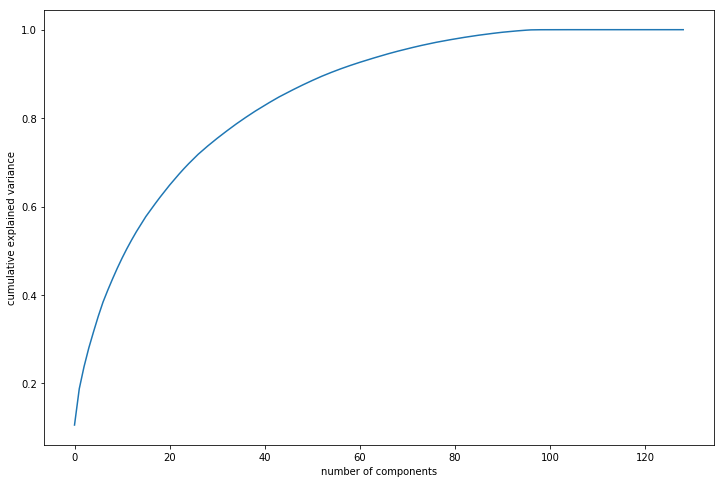

In [52]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

###  from the Scree Plot we will chose 58 components for modeling

In [53]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=58)

In [54]:
X_train_pca = pd.DataFrame(pca_final.fit_transform(X_train))
X_train_pca.shape

(35102, 58)

In [55]:
#Applying selected components to the test data - 58 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8208, 58)

# DECISION TREE WITH PCA

### HYPERPARAMETER TUNING

In [56]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=-1,scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                     

In [57]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.704170,0.014149,0.008049,0.007004,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.716809,0.806323,0.820513,0.808547,0.823932,0.795225,0.039782,13
1,2.733735,0.030927,0.010195,0.001166,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.716809,0.806323,0.820513,0.808547,0.823932,0.795225,0.039782,13
2,2.917487,0.168607,0.010447,0.005714,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.715385,0.806323,0.828205,0.802849,0.821368,0.794826,0.040807,15
3,2.821955,0.080541,0.012501,0.006251,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.715385,0.806323,0.828205,0.802849,0.821368,0.794826,0.040807,15
4,4.486138,0.022032,0.012320,0.004208,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.822507,0.845628,0.863533,0.843305,0.848718,0.844738,0.013162,3
5,4.869842,0.593854,0.015245,0.011399,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.822507,0.845913,0.862963,0.843305,0.849003,0.844738,0.013023,4
6,5.099707,0.065025,0.015610,0.010278,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.796296,0.829393,0.847863,0.845014,0.806838,0.825081,0.020476,7
7,4.531206,0.240497,0.015845,0.003797,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.796296,0.829393,0.847863,0.845014,0.806838,0.825081,0.020476,7
8,1.760682,0.092472,0.009123,0.005174,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.788604,0.832811,0.817949,0.810541,0.796296,0.809240,0.015662,9
9,1.876590,0.017939,0.013592,0.008208,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.788604,0.832811,0.817949,0.810541,0.796296,0.809240,0.015662,9


In [58]:
print(grid_search.best_params_)


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [59]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier(max_depth=10,min_samples_leaf=50,min_samples_split=50,criterion='gini')

# Fit the grid search to the data
dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
# Making predictions
y_pred = dtree.predict(X_test_pca)

In [61]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [62]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.802
Specificity:0.696
Accuracy:0.705


In [63]:
dtree.score(X_test_pca,y_test)

0.7049220272904484

In [64]:
print("best accuracy", grid_search.best_score_)


best accuracy 0.8528281729136186


# RANDOM FOREST WITH PCA

In [65]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [67]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7547
           1       0.32      0.65      0.43       661

    accuracy                           0.86      8208
   macro avg       0.64      0.76      0.68      8208
weighted avg       0.91      0.86      0.88      8208



In [68]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6652  895]
 [ 233  428]]


In [69]:
print(accuracy_score(y_test,predictions))

0.8625730994152047


##### So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

### HYPERPARAMETER TUNING


In [70]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring='recall')

In [71]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 24.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [72]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8372167418723563 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [73]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)

In [74]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
# Making predictions
y_pred = rfc.predict(X_test_pca)

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      7547
           1       0.21      0.81      0.33       661

    accuracy                           0.74      8208
   macro avg       0.59      0.77      0.59      8208
weighted avg       0.92      0.74      0.80      8208



In [77]:
confusion = confusion_matrix(y_test,y_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[5534 2013]
 [ 124  537]]


In [78]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.812
Specificity:0.733
Accuracy:0.74


In [79]:
# Finding the Area Under Curve
pred_probs_test = rfc.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

AUC:0.85


# BOOSTING WITH PCA

In [80]:
# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [81]:
# fit
adaboost_model_1.fit(X_train_pca, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [82]:
# predictions
# the second column represents the probability of a click resulting in a download
predictions = adaboost_model_1.predict_proba(X_test_pca)
predictions[:10]

array([[0.50918699, 0.49081301],
       [0.50988253, 0.49011747],
       [0.51754888, 0.48245112],
       [0.49302908, 0.50697092],
       [0.50617272, 0.49382728],
       [0.50228665, 0.49771335],
       [0.49017847, 0.50982153],
       [0.51743669, 0.48256331],
       [0.51002552, 0.48997448],
       [0.51411789, 0.48588211]])

In [83]:
metrics.roc_auc_score(y_test, predictions[:,1])

0.8342620235430336

### AdaBoost - Hyperparameter Tuning

Let's now tune the hyperparameters of the AdaBoost classifier. In this case, we have two types of hyperparameters - those of the component trees (max_depth etc.) and those of the ensemble (n_estimators, learning_rate etc.). 

In [84]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [85]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [86]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

In [87]:
# fit 
grid_search_ABC.fit(X_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 76.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
   

In [88]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,75.945434,0.238885,0.679051,0.005683,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.923277,0.930649,0.927573,0.927166,0.003023,6,0.942606,0.935989,0.935572,0.938056,3.222267e-03
1,151.139862,0.143656,1.349843,0.010636,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.930442,0.937285,0.934703,0.934143,0.002821,5,0.952108,0.944102,0.943876,0.946695,3.828345e-03
2,227.067296,1.194092,2.059369,0.042620,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.931894,0.940651,0.939088,0.937211,0.003814,4,0.954101,0.948092,0.949364,0.950519,2.585711e-03
3,175.118013,1.504817,0.770190,0.060959,5,200,"{'base_estimator__max_depth': 5, 'n_estimators...",0.972775,0.978661,0.980037,0.977158,0.003150,3,0.999897,0.999333,0.999549,0.999593,2.323745e-04
4,348.721382,2.192600,1.482608,0.055463,5,400,"{'base_estimator__max_depth': 5, 'n_estimators...",0.980780,0.984670,0.987441,0.984297,0.002732,2,1.000000,1.000000,1.000000,1.000000,3.443380e-09
5,524.841300,1.446781,2.159745,0.008735,5,600,"{'base_estimator__max_depth': 5, 'n_estimators...",0.983405,0.987506,0.989534,0.986815,0.002549,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00


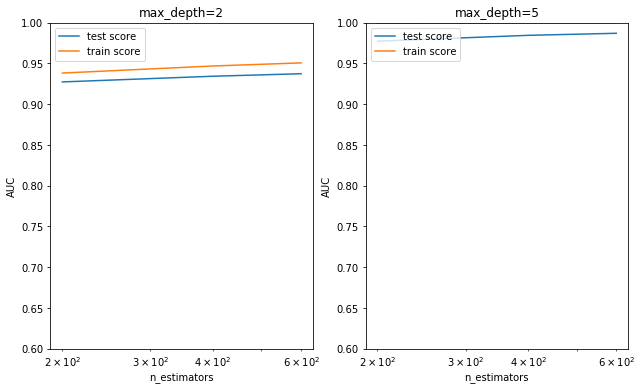

In [89]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### The results above show that:
- The ensemble with max_depth=5 is clearly overfitting (training auc is almost 1, while the test score is much lower)
- At max_depth=2, the model performs slightly better (approx 95% AUC) with a higher test score 


In [90]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=200,
    algorithm="SAMME")

ABC.fit(X_train_pca, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [91]:
# predict on test data
predictions = ABC.predict(X_test_pca)
predictions[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [92]:
confusion = confusion_matrix(y_test,predictions)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


[[5108 2439]
 [  95  566]]


In [93]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.856
Specificity:0.677
Accuracy:0.74


In [94]:
# Finding the Area Under Curve
pred_probs_test = rfc.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

AUC:0.85


In [95]:
# predict on test data
predictions = ABC.predict_proba(X_test_pca)
predictions[:10]

array([[0.52633895, 0.47366105],
       [0.53486597, 0.46513403],
       [0.53174224, 0.46825776],
       [0.47658658, 0.52341342],
       [0.5282198 , 0.4717802 ],
       [0.52360826, 0.47639174],
       [0.46628751, 0.53371249],
       [0.53080307, 0.46919693],
       [0.50456396, 0.49543604],
       [0.55744943, 0.44255057]])

In [96]:
# roc auc
metrics.roc_auc_score(y_test, predictions[:, 1])

0.8537100934997968

### Gradient Boosting Classifier


In [97]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [98]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [99]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train_pca, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 18.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=2,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=200,
                                                  n_iter_no_change=None,
         

In [100]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,18.961436,0.531776,0.060570,0.007760,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.936705,0.946996,0.947629,0.943777,0.005007,6,0.958114,0.952352,0.954027,0.954831,0.002420
1,38.223344,0.437896,0.040390,0.000572,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.938655,0.948468,0.946101,0.944408,0.004181,5,0.959706,0.954320,0.954384,0.956137,0.002524
2,59.199130,0.090704,0.038031,0.007634,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.939464,0.947663,0.947572,0.944900,0.003844,4,0.960615,0.954988,0.955661,0.957088,0.002509
3,18.353969,0.063129,0.037367,0.006812,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.930858,0.938801,0.936122,0.935261,0.003300,8,0.958546,0.952625,0.952147,0.954440,0.002910
4,39.029152,0.362623,0.033407,0.001581,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.943304,0.946845,0.946105,0.945418,0.001525,3,0.976713,0.957683,0.961558,0.965318,0.008212


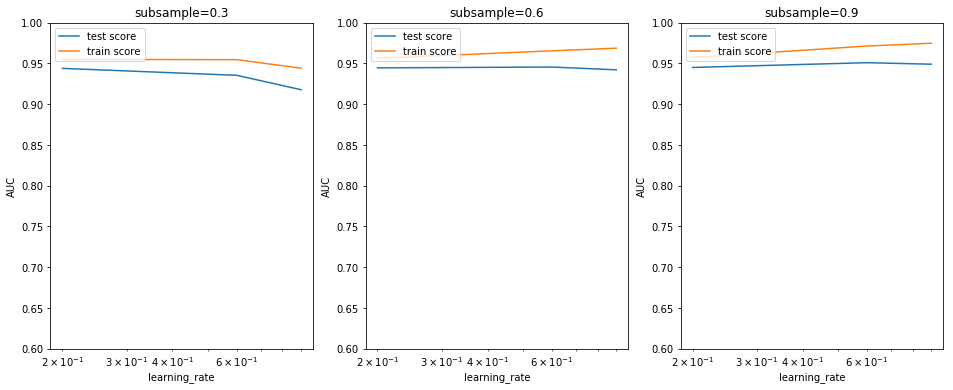

In [101]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


##### It is clear from the plot above that the model with a lower subsample ratio performs better, while those with higher subsamples tend to overfit. 

##### Also, a lower learning rate results in less overfitting.

In [102]:
# metrics: AUC
metrics.roc_auc_score(y_test, predictions[:,1])

0.8537100934997968

# LOGISTIC REGRESSION WITHOUT PCA

In [103]:
y_train = list(y_train)

In [104]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                35102
Model:                            GLM   Df Residuals:                    34981
Model Family:                Binomial   Df Model:                          120
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10585.
Date:                Sun, 15 Mar 2020   Deviance:                       21170.
Time:                        20:47:45   Pearson chi2:                 1.12e+05
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3128      0.028    -11.069      0.000      -0.368      -0.257
loc_og_t2o_mou      3.336e-08   5.35e-08      0.624      0.533   -7.14e-08    1.38e-07
std_og_t2o_mou      1.383e-07   5.65e-08      2.448      0.014    2.75e-08    2.49e-07
loc_ic_t2o_mou      5.332e-08   5.04e-08      1.058      0.290   -4.54e-08    1.52e-07
arpu_6                -0.1834      0.053     -3.434      0.001      -0.288      -0.079
arpu_7                -0.2539      0.054     -4.708      0.000      -0.360      -0.148
arpu_8                 0.7601      0.081      9.355      0.000       0.601       0.919
onnet_mou_6            4.3369      2.706      1.603      0.109      -0.967       9.640
onnet_mou_7           -6.3439      1.738     -3.649      0.000      -9.751      -2.937
onnet_mou_8           -3.6493      1.626     -2.244      0.025      -6.837      -0.462
offnet_mou_6           5.0508      2.842      1.777      0.076      -0.520      10.621
offnet_mou_7          -5.2842      1.792     -2.949      0.003      -8.796      -1.772
offnet_mou_8          -5.2938      1.636     -3.236      0.001      -8.500      -2.088
roam_ic_mou_6          0.0491      0.030      1.655      0.098      -0.009       0.107
roam_ic_mou_7          0.0880      0.035      2.541      0.011       0.020       0.156
roam_ic_mou_8         -0.0249      0.024     -1.021      0.307      -0.073       0.023
roam_og_mou_6         -1.2847      0.682     -1.883      0.060      -2.622       0.052
roam_og_mou_7          1.3379      0.385      3.475      0.001       0.583       2.092
roam_og_mou_8          1.2136      0.414      2.932      0.003       0.402       2.025
loc_og_t2t_mou_6    1442.0642    676.274      2.132      0.033     116.592    2767.536
loc_og_t2t_mou_7    1299.9790    680.211      1.911      0.056     -33.210    2633.167
loc_og_t2t_mou_8    2731.4352    611.419      4.467      0.000    1533.076    3929.795
loc_og_t2m_mou_6    1718.3926    806.071      2.132      0.033     138.522    3298.263
loc_og_t2m_mou_7    1379.8280    722.292      1.910      0.056     -35.839    2795.495
loc_og_t2m_mou_8    2960.4080    662.523      4.468      0.000    1661.886    4258.930
loc_og_t2f_mou_6     121.2612     56.877      2.132      0.033       9.784     232.738
loc_og_t2f_mou_7     102.7307     53.838      1.908      0.056      -2.789     208.251
loc_og_t2f_mou_8     237.9443     53.230      4.470      0.000     133.616     342.272
loc_og_t2c_mou_6      -0.1842      0.025     -7.332      0.000      -0.233      -0.135
loc_og_t2c_mou_7       0.0329      0.031      1.050      0.294      -0.028       0.094
loc_og_t2c_mou_8       0.1105      0.028      3.980      0.000       0.056       0.165
loc_og_mou_6       -2738.1751   1126.572     -2.431      0.015   -4946.216    -530.134
loc_og_mou_7       -1604.9242   1057.315     -1.518      0.129   -3677.223     467.375
loc_og_mou_8       -3965.4726 

In [105]:
# initializing logistic regtession
logreg = LogisticRegression()

## FEATURE SELECTION USING RFE

In [106]:
rfe = RFE(logreg, 20)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [107]:
rfe.support_

array([False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,

In [108]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 110),
 ('std_og_t2o_mou', False, 109),
 ('loc_ic_t2o_mou', False, 108),
 ('arpu_6', False, 34),
 ('arpu_7', False, 35),
 ('arpu_8', False, 27),
 ('onnet_mou_6', False, 66),
 ('onnet_mou_7', False, 61),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 44),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 82),
 ('roam_ic_mou_7', False, 41),
 ('roam_ic_mou_8', False, 91),
 ('roam_og_mou_6', False, 49),
 ('roam_og_mou_7', False, 98),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 54),
 ('loc_og_t2t_mou_7', False, 62),
 ('loc_og_t2t_mou_8', False, 15),
 ('loc_og_t2m_mou_6', False, 17),
 ('loc_og_t2m_mou_7', False, 23),
 ('loc_og_t2m_mou_8', False, 39),
 ('loc_og_t2f_mou_6', False, 94),
 ('loc_og_t2f_mou_7', False, 40),
 ('loc_og_t2f_mou_8', False, 80),
 ('loc_og_t2c_mou_6', False, 32),
 ('loc_og_t2c_mou_7', False, 101),
 ('loc_og_t2c_mou_8', False, 70),
 ('loc_og_mou_6', False, 46),
 ('loc_og_mou_7', False, 22),
 ('lo

In [109]:
col = X_train.columns[rfe.support_]

In [110]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'roam_ic_mou_6',
       ...
       'sachet_3g_7', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'Average_Data_Call', 'Total_MOU_6', 'Total_MOU_7', 'Monthly_2g_3g_6',
       'Monthly_2g_3g_7'],
      dtype='object', length=109)

##### Assessing the model with StatsModels

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                35102
Model:                            GLM   Df Residuals:                    35081
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12129.
Date:                Sun, 15 Mar 2020   Deviance:                       24258.
Time:                        20:49:37   Pearson chi2:                 9.58e+04
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3368      0.025    -13.724      0.000      -0.385      -0.289
onnet_mou_8          6.4290      1.001      6.425      0.000       4.468       8.390
offnet_mou_7         0.5013      0.028     17.642      0.000       0.446       0.557
offnet_mou_8         5.1183      1.021      5.014      0.000       3.117       7.119
roam_og_mou_8       -1.2847      0.257     -4.996      0.000      -1.789      -0.781
std_og_t2m_mou_8     0.9183      0.062     14.782      0.000       0.797       1.040
total_og_mou_8     -10.4627      1.572     -6.657      0.000     -13.543      -7.382
loc_ic_t2t_mou_8     0.4398      0.153      2.867      0.004       0.139       0.741
loc_ic_t2m_mou_8     0.6634      0.201      3.301      0.001       0.270       1.057
loc_ic_mou_7         0.8095      0.044     18.599      0.000       0.724       0.895
loc_ic_mou_8         2.5584      0.873      2.929      0.003       0.846       4.270
std_ic_t2t_mou_8    -0.0946      0.044     -2.168      0.030      -0.180      -0.009
std_ic_mou_8         2.0223      0.353      5.729      0.000       1.330       2.714
total_ic_mou_8      -6.2045      1.001     -6.196      0.000      -8.167      -4.242
spl_ic_mou_8        -0.4041      0.027    -14.890      0.000      -0.457      -0.351
isd_ic_mou_8         1.1221      0.179      6.286      0.000       0.772       1.472
monthly_2g_8        -1.0756      0.039    -27.437      0.000      -1.152      -0.999
sachet_2g_8         -0.6786      0.026    -26.226      0.000      -0.729      -0.628
monthly_3g_8        -0.9439      0.031    -30.651      0.000      -1.004      -0.884
sachet_3g_8         -0.5668      0.042    -13.630      0.000      -0.648      -0.485
sep_vbc_3g          -0.6027      0.071     -8.521      0.000      -0.741      -0.464
====================================================================================
"""

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_og_mou_8,2040.02
2,offnet_mou_8,863.25
0,onnet_mou_8,829.89
12,total_ic_mou_8,786.68
9,loc_ic_mou_8,591.62
11,std_ic_mou_8,99.69
3,roam_og_mou_8,55.17
7,loc_ic_t2m_mou_8,30.02
14,isd_ic_mou_8,26.61
6,loc_ic_t2t_mou_8,16.64


### Dropping the total_og_mou_8 due to high VIF

In [113]:
col = col.drop('total_og_mou_8')

In [114]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                35102
Model:                            GLM   Df Residuals:                    35082
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12153.
Date:                Sun, 15 Mar 2020   Deviance:                       24306.
Time:                        20:49:39   Pearson chi2:                 9.60e+04
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3476      0.024    -14.254      0.000      -0.395      -0.300
onnet_mou_8         -0.2316      0.017    -13.987      0.000      -0.264      -0.199
offnet_mou_7         0.4951      0.028     17.447      0.000       0.440       0.551
offnet_mou_8        -1.6649      0.073    -22.782      0.000      -1.808      -1.522
roam_og_mou_8        0.4241      0.020     21.121      0.000       0.385       0.463
std_og_t2m_mou_8     0.9142      0.062     14.727      0.000       0.793       1.036
loc_ic_t2t_mou_8     0.4007      0.152      2.639      0.008       0.103       0.698
loc_ic_t2m_mou_8     0.6178      0.199      3.109      0.002       0.228       1.007
loc_ic_mou_7         0.8151      0.043     18.742      0.000       0.730       0.900
loc_ic_mou_8         7.9564      0.332     23.953      0.000       7.305       8.607
std_ic_t2t_mou_8    -0.1026      0.044     -2.323      0.020      -0.189      -0.016
std_ic_mou_8         4.2844      0.105     40.713      0.000       4.078       4.491
total_ic_mou_8     -12.6560      0.282    -44.907      0.000     -13.208     -12.104
spl_ic_mou_8        -0.4066      0.027    -15.012      0.000      -0.460      -0.353
isd_ic_mou_8         2.2634      0.054     42.170      0.000       2.158       2.369
monthly_2g_8        -1.0717      0.039    -27.404      0.000      -1.148      -0.995
sachet_2g_8         -0.6776      0.026    -26.257      0.000      -0.728      -0.627
monthly_3g_8        -0.9374      0.031    -30.575      0.000      -0.997      -0.877
sachet_3g_8         -0.5682      0.042    -13.690      0.000      -0.650      -0.487
sep_vbc_3g          -0.6037      0.071     -8.519      0.000      -0.743      -0.465
====================================================================================
"""

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,loc_ic_mou_8,101.01
11,total_ic_mou_8,80.13
6,loc_ic_t2m_mou_8,29.99
5,loc_ic_t2t_mou_8,16.62
10,std_ic_mou_8,12.34
2,offnet_mou_8,6.68
4,std_og_t2m_mou_8,5.57
13,isd_ic_mou_8,3.81
7,loc_ic_mou_7,2.53
9,std_ic_t2t_mou_8,2.06


#### Dropping  total_ic_mou_8 due to high VIF

In [116]:
col = col.drop('total_ic_mou_8')

In [117]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                35102
Model:                            GLM   Df Residuals:                    35083
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14268.
Date:                Sun, 15 Mar 2020   Deviance:                       28536.
Time:                        20:49:41   Pearson chi2:                 3.61e+05
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6587      0.021    -30.998      0.000      -0.700      -0.617
onnet_mou_8         -0.4308      0.018    -24.205      0.000      -0.466      -0.396
offnet_mou_7         0.3868      0.027     14.516      0.000       0.335       0.439
offnet_mou_8        -1.5040      0.066    -22.870      0.000      -1.633      -1.375
roam_og_mou_8        0.2970      0.019     15.676      0.000       0.260       0.334
std_og_t2m_mou_8     0.6654      0.056     11.801      0.000       0.555       0.776
loc_ic_t2t_mou_8    -1.0430      0.087    -11.970      0.000      -1.214      -0.872
loc_ic_t2m_mou_8    -1.1932      0.107    -11.155      0.000      -1.403      -0.984
loc_ic_mou_7         0.3912      0.036     10.983      0.000       0.321       0.461
loc_ic_mou_8         0.2005      0.135      1.485      0.137      -0.064       0.465
std_ic_t2t_mou_8    -0.2414      0.052     -4.611      0.000      -0.344      -0.139
std_ic_mou_8        -0.2531      0.036     -7.077      0.000      -0.323      -0.183
spl_ic_mou_8        -0.5216      0.029    -18.076      0.000      -0.578      -0.465
isd_ic_mou_8        -0.0732      0.021     -3.493      0.000      -0.114      -0.032
monthly_2g_8        -1.1398      0.035    -32.582      0.000      -1.208      -1.071
sachet_2g_8         -0.9024      0.027    -33.532      0.000      -0.955      -0.850
monthly_3g_8        -0.7848      0.024    -32.841      0.000      -0.832      -0.738
sachet_3g_8         -0.6994      0.041    -17.020      0.000      -0.780      -0.619
sep_vbc_3g          -0.8838      0.085    -10.392      0.000      -1.050      -0.717
====================================================================================
"""

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,loc_ic_mou_8,57.91
6,loc_ic_t2m_mou_8,29.55
5,loc_ic_t2t_mou_8,16.40
2,offnet_mou_8,6.68
4,std_og_t2m_mou_8,5.56
7,loc_ic_mou_7,2.53
10,std_ic_mou_8,2.13
9,std_ic_t2t_mou_8,2.06
1,offnet_mou_7,1.86
3,roam_og_mou_8,1.15


### Dropping onnet_mou_7 due to high VIF

In [120]:
col = col.drop('loc_ic_mou_8')

In [121]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                35102
Model:                            GLM   Df Residuals:                    35084
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14269.
Date:                Sun, 15 Mar 2020   Deviance:                       28538.
Time:                        20:52:30   Pearson chi2:                 3.36e+05
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6576      0.021    -30.979      0.000      -0.699      -0.616
onnet_mou_8         -0.4315      0.018    -24.235      0.000      -0.466      -0.397
offnet_mou_7         0.3839      0.027     14.464      0.000       0.332       0.436
offnet_mou_8        -1.4984      0.066    -22.842      0.000      -1.627      -1.370
roam_og_mou_8        0.2954      0.019     15.629      0.000       0.258       0.332
std_og_t2m_mou_8     0.6608      0.056     11.744      0.000       0.551       0.771
loc_ic_t2t_mou_8    -0.9424      0.055    -17.160      0.000      -1.050      -0.835
loc_ic_t2m_mou_8    -1.0525      0.049    -21.449      0.000      -1.149      -0.956
loc_ic_mou_7         0.4006      0.035     11.382      0.000       0.332       0.470
std_ic_t2t_mou_8    -0.2435      0.052     -4.651      0.000      -0.346      -0.141
std_ic_mou_8        -0.2518      0.036     -7.044      0.000      -0.322      -0.182
spl_ic_mou_8        -0.5221      0.029    -18.090      0.000      -0.579      -0.466
isd_ic_mou_8        -0.0736      0.021     -3.519      0.000      -0.115      -0.033
monthly_2g_8        -1.1392      0.035    -32.564      0.000      -1.208      -1.071
sachet_2g_8         -0.9036      0.027    -33.584      0.000      -0.956      -0.851
monthly_3g_8        -0.7840      0.024    -32.813      0.000      -0.831      -0.737
sachet_3g_8         -0.6985      0.041    -16.990      0.000      -0.779      -0.618
sep_vbc_3g          -0.8817      0.085    -10.389      0.000      -1.048      -0.715
====================================================================================
"""

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,offnet_mou_8,6.65
4,std_og_t2m_mou_8,5.54
7,loc_ic_mou_7,2.44
6,loc_ic_t2m_mou_8,2.27
9,std_ic_mou_8,2.13
8,std_ic_t2t_mou_8,2.06
1,offnet_mou_7,1.85
5,loc_ic_t2t_mou_8,1.51
3,roam_og_mou_8,1.15
0,onnet_mou_8,1.09


In [123]:
col = col.drop('offnet_mou_8')

In [124]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                35102
Model:                            GLM   Df Residuals:                    35085
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14603.
Date:                Sun, 15 Mar 2020   Deviance:                       29205.
Time:                        21:01:03   Pearson chi2:                 6.74e+05
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6983      0.021    -32.801      0.000      -0.740      -0.657
onnet_mou_8         -0.4170      0.018    -23.676      0.000      -0.451      -0.382
offnet_mou_7         0.1895      0.022      8.625      0.000       0.146       0.233
roam_og_mou_8        0.0891      0.016      5.531      0.000       0.058       0.121
std_og_t2m_mou_8    -0.4626      0.023    -19.823      0.000      -0.508      -0.417
loc_ic_t2t_mou_8    -1.0785      0.057    -18.906      0.000      -1.190      -0.967
loc_ic_t2m_mou_8    -1.7172      0.045    -37.861      0.000      -1.806      -1.628
loc_ic_mou_7         0.4967      0.036     13.936      0.000       0.427       0.567
std_ic_t2t_mou_8    -0.2228      0.051     -4.354      0.000      -0.323      -0.122
std_ic_mou_8        -0.2619      0.036     -7.372      0.000      -0.332      -0.192
spl_ic_mou_8        -0.5120      0.029    -17.865      0.000      -0.568      -0.456
isd_ic_mou_8        -0.0883      0.021     -4.211      0.000      -0.129      -0.047
monthly_2g_8        -1.1279      0.035    -32.277      0.000      -1.196      -1.059
sachet_2g_8         -0.8798      0.027    -33.038      0.000      -0.932      -0.828
monthly_3g_8        -0.7806      0.024    -32.822      0.000      -0.827      -0.734
sachet_3g_8         -0.6920      0.041    -16.759      0.000      -0.773      -0.611
sep_vbc_3g          -0.8907      0.086    -10.403      0.000      -1.059      -0.723
====================================================================================
"""

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_ic_mou_7,2.44
8,std_ic_mou_8,2.13
7,std_ic_t2t_mou_8,2.06
5,loc_ic_t2m_mou_8,1.83
1,offnet_mou_7,1.68
3,std_og_t2m_mou_8,1.68
4,loc_ic_t2t_mou_8,1.50
0,onnet_mou_8,1.08
12,sachet_2g_8,1.07
2,roam_og_mou_8,1.05


### Now as P-value of all variables are less than 0.05 and VIF less than 5.

### These are the important variables

In [126]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.004781
1    0.074402
2    0.018351
3    0.004745
4    0.066888
5    0.576253
6    0.005053
7    0.155323
8    0.271115
9    0.561785
dtype: float64

In [127]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00478102, 0.07440166, 0.01835125, 0.00474518, 0.06688809,
       0.57625307, 0.00505304, 0.15532302, 0.27111545, 0.56178459])

In [128]:
y_train = pd.Series(y_train)

In [129]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churned,Churn_Prob,CustID
0,0,0.004781,0
1,0,0.074402,1
2,0,0.018351,2
3,0,0.004745,3
4,0,0.066888,4


In [130]:
y_train_pred_final['Churn_Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,CustID,Churn_Predicted
0,0,0.004781,0,0
1,0,0.074402,1,0
2,0,0.018351,2,0
3,0,0.004745,3,0
4,0,0.066888,4,0


In [131]:
confusion = confusion_matrix(y_train_pred_final.Churned,y_train_pred_final.Churn_Predicted)
print(confusion)

[[13436  4115]
 [ 2057 15494]]


In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))

# positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.882798700928722
0.7655404250470059
0.790147381304503
0.8672303620990125


In [134]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [135]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churn_Prob, drop_intermediate = False )

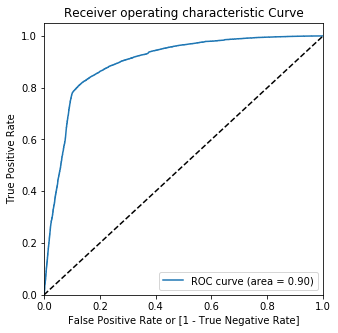

In [136]:
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

In [137]:
# ROC AUC SCORE
metrics.auc(fpr, tpr)

0.8975864995130903

###  Finding Optimal Cutoff Point

In [138]:
# Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,CustID,Churn_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.004781,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.074402,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.018351,2,0,1,0,0,0,0,0,0,0,0,0
3,0,0.004745,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.066888,4,0,1,0,0,0,0,0,0,0,0,0


In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.712011  0.973278  0.450744
0.2   0.2  0.755712  0.955216  0.556208
0.3   0.3  0.782776  0.930089  0.635462
0.4   0.4  0.806222  0.909179  0.703265
0.5   0.5  0.824170  0.882799  0.765540
0.6   0.6  0.836135  0.846391  0.825879
0.7   0.7  0.841320  0.797390  0.885249
0.8   0.8  0.712182  0.481169  0.943194
0.9   0.9  0.533588  0.073386  0.993790


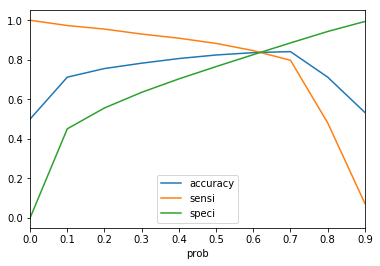

In [140]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

 #### From the curve above, 0.6 is the optimum point to take it as a cutoff probability

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.6 else 0)

y_train_pred_final.head(10)

,Churned,Churn_Prob,CustID,Churn_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.004781,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.074402,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.018351,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.004745,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.066888,4,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0.576253,5,1,1,1,1,1,1,1,0,0,0,0,0
6,0,0.005053,6,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0.155323,7,0,1,1,0,0,0,0,0,0,0,0,0
8,0,0.271115,8,0,1,1,1,0,0,0,0,0,0,0,0
9,0,0.561785,9,1,1,1,1,1,1,1,0,0,0,0,0


In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

0.8361346931798758

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.final_predicted )
confusion2

array([[14495,  3056],
       [ 2696, 14855]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))

# positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.8463905190587431
0.8258788673010085
0.8293785941600134
0.8431737537083358


# CONCLUSION

##### 1. Decision Trees With PCA

##### Sensitivity:0.802
##### Specificity:0.696
##### Accuracy:0.705

##### 2. Random Forest with PCA
##### Sensitivity:0.812
##### Specificity:0.733
##### Accuracy:0.743

### 3. AdaBoost With PCA
##### Sensitivity:0.856
##### Specificity:0.677
##### Accuracy:0.74

### 4. Logistic Regression with PCA
##### Sensitivity:0.8463905190587431
##### Specificity:0.8258788673010085

#### Best Model with accuracy of 74%, sensitivity of 85% , the best model found out to be is AdaBoost With PCA

### Based on the analysis and predictions the following strategies can be taken to reduce the churn rate :

##### 1. Introduce personalized offers for the customers
##### 2. Identify the most valuable customers and communicate with them to see if they are having any concerns.
##### 3. Provide better customer service
##### 4. Monitor the usage of the high value customers, active customers are less likely to churn.

### The important variables that are strong predictors of churn.
##### loc_ic_mou_7
##### std_ic_mou_8
##### std_ic_t2t_mou_8
##### loc_ic_t2m_mou_8
##### offnet_mou_7
##### std_og_t2m_mou_8
##### loc_ic_t2t_mou_8
##### onnet_mou_8
##### sachet_2g_8
##### roam_og_mou_8
##### monthly_3g_8
##### sachet_3g_8
##### spl_ic_mou_8
##### monthly_2g_8
##### sep_vbc_3g
##### isd_ic_mou_8
